In [1]:
import pandas as pd

# Step 1: Import the dataset from the CSV file
file_path = 'J:\Headlines\ciencia de datos\else\IA Generativa\mejore su carrera en el análisis de datos\WEEK 2/laptop_pricing_dataset_mod2.csv'
data = pd.read_csv(file_path)

# Step 2: Generate the statistical description of all features, including object data types
description = data.describe(include='all')

# Display the description
print(description)

        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count   238.000000  238.000000        238.00

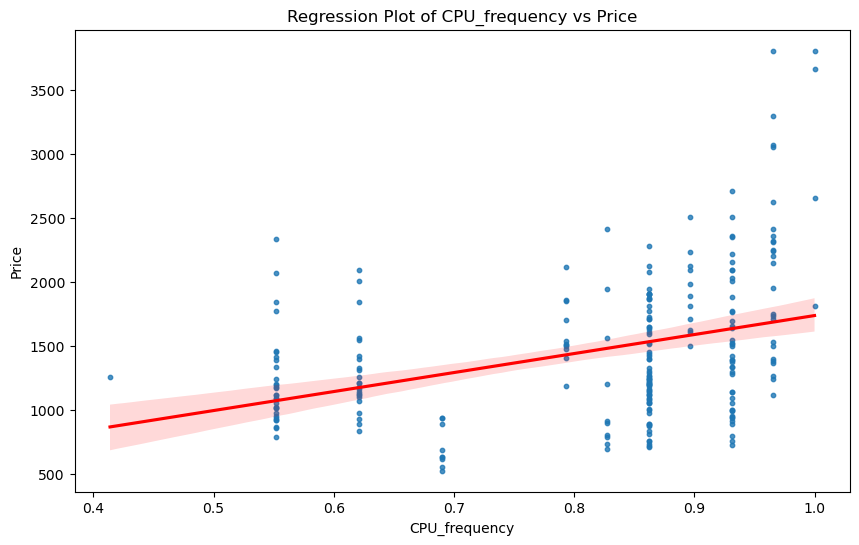

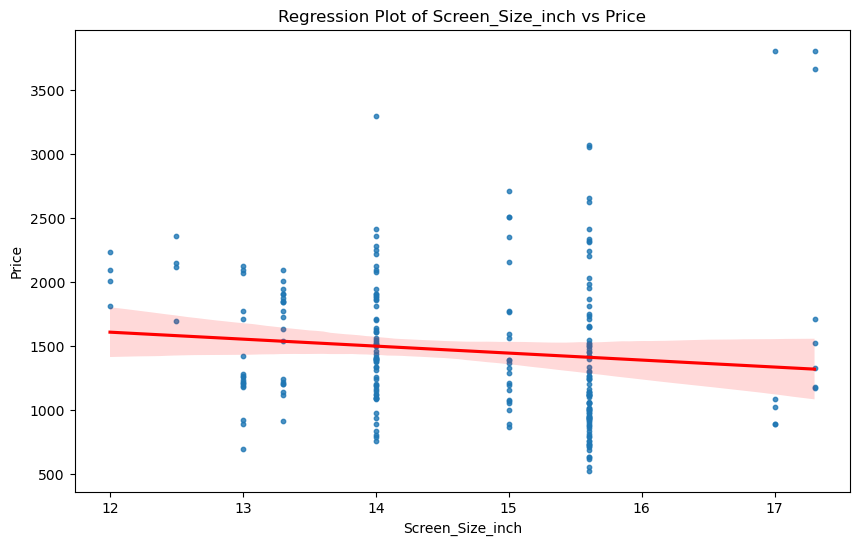

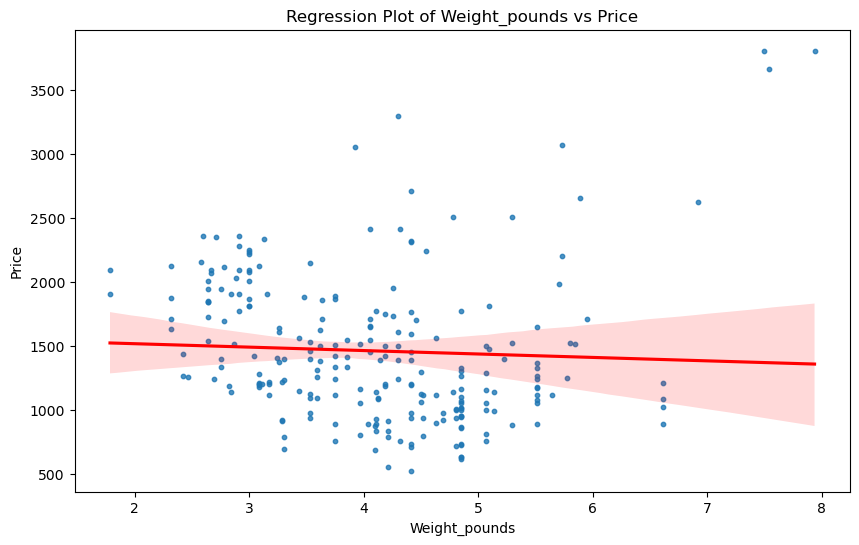

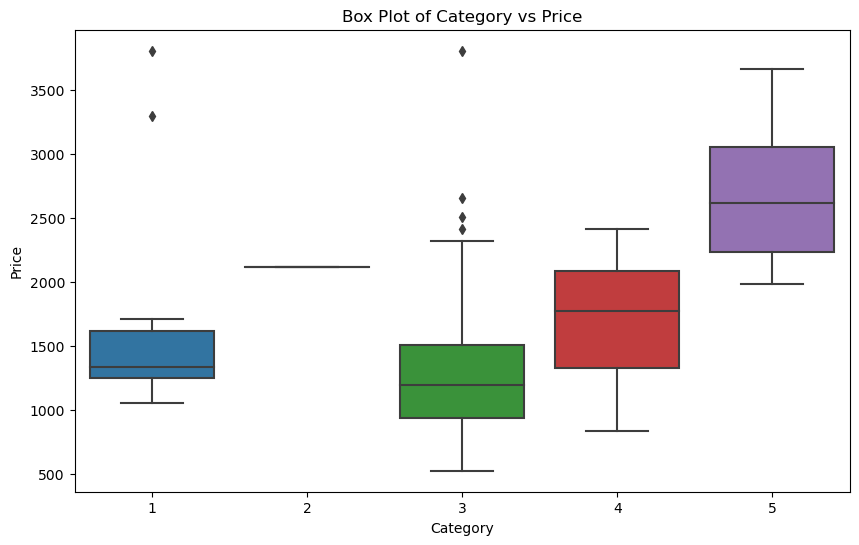

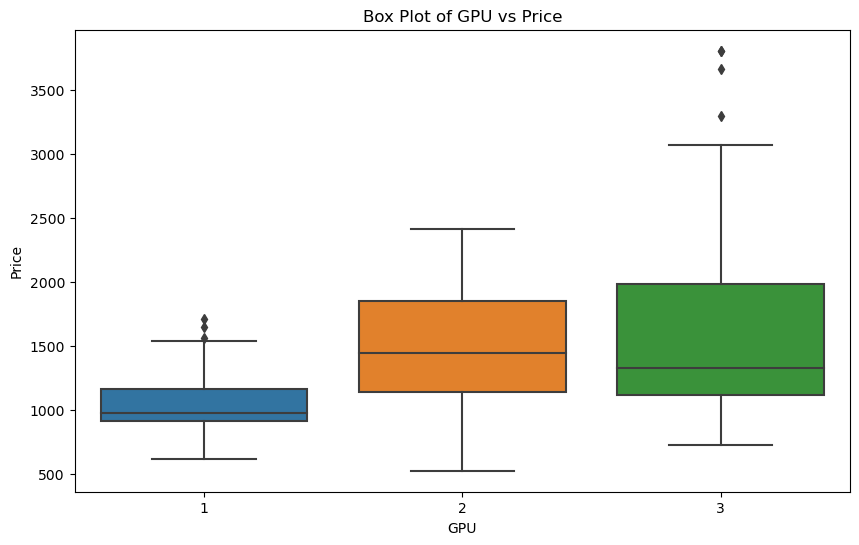

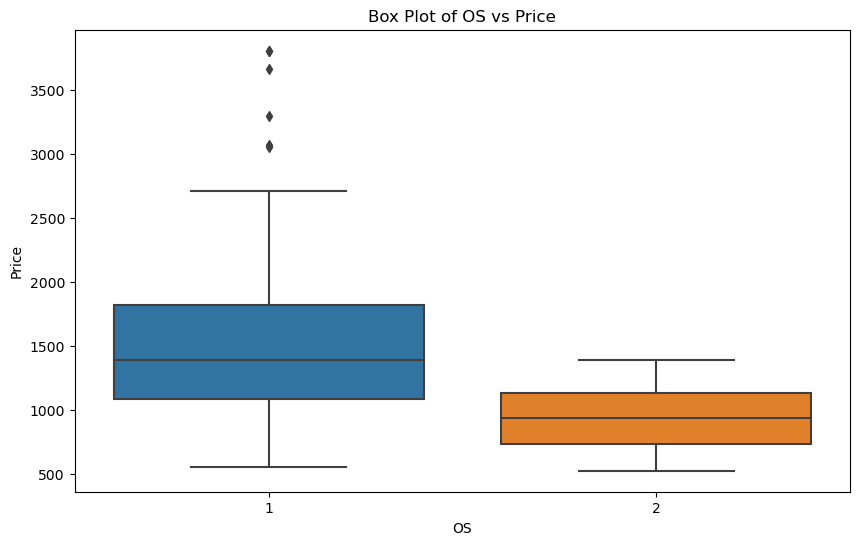

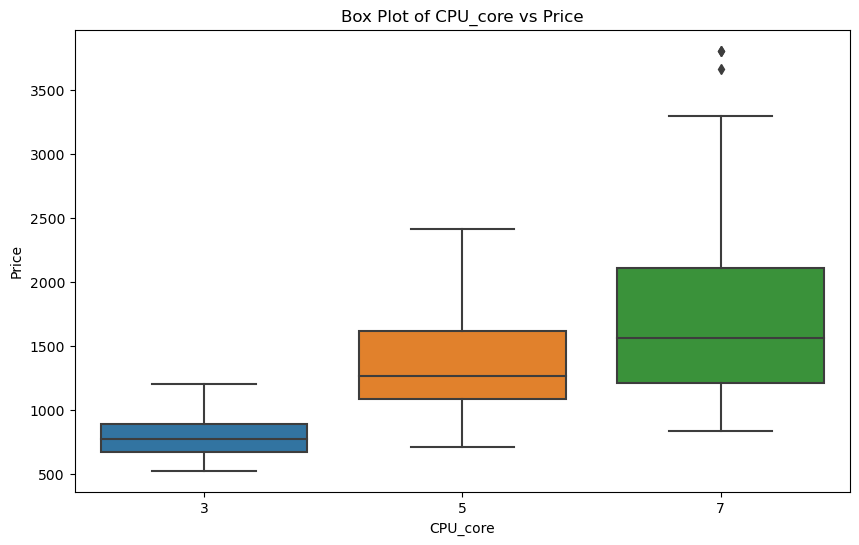

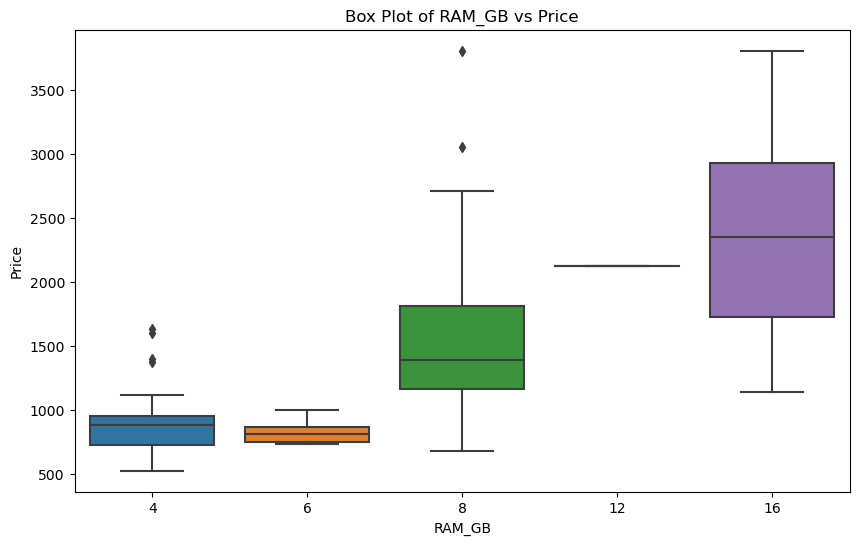

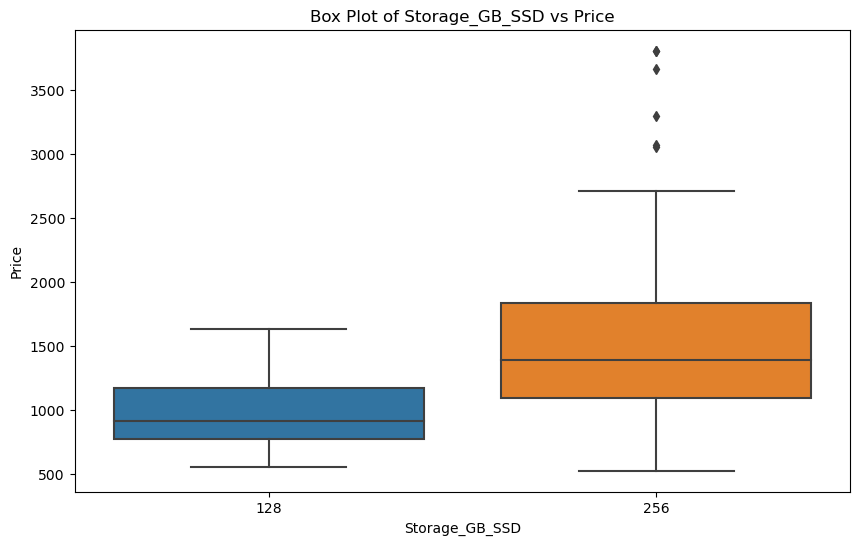

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'J:\Headlines\ciencia de datos\else\IA Generativa\mejore su carrera en el análisis de datos\WEEK 2/laptop_pricing_dataset_mod2.csv'
data = pd.read_csv(file_path)

# Create regression plots for specified attributes against "Price"
attributes_regression = ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]
for attr in attributes_regression:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=attr, y="Price", data=data, scatter_kws={'s':10}, line_kws={'color':'red'})
    plt.title(f'Regression Plot of {attr} vs Price')
    plt.xlabel(attr)
    plt.ylabel("Price")
    plt.show()

# Create box plots for specified attributes against "Price"
attributes_boxplot = ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]
for attr in attributes_boxplot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=attr, y="Price", data=data)
    plt.title(f'Box Plot of {attr} vs Price')
    plt.xlabel(attr)
    plt.ylabel("Price")
    plt.show()

In [3]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Load the dataset
file_path ='J:\Headlines\ciencia de datos\else\IA Generativa\mejore su carrera en el análisis de datos\WEEK 2/laptop_pricing_dataset_mod2.csv'
data = pd.read_csv(file_path)

# List of numerical attributes
numerical_attributes = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_attributes.remove('Price')  # Remove the target variable from the list

# Initialize lists to store results
attributes = []
correlation_values = []
pearson_coefficients = []
p_values = []

# Calculate correlation, Pearson coefficient, and p-values
for attr in numerical_attributes:
    correlation = data[attr].corr(data['Price'])
    pearson_coef, p_val = pearsonr(data[attr], data['Price'])
    
    attributes.append(attr)
    correlation_values.append(correlation)
    pearson_coefficients.append(pearson_coef)
    p_values.append(p_val)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Attribute': attributes,
    'Correlation Value': correlation_values,
    'Pearson Coefficient': pearson_coefficients,
    'P-value': p_values
})

# Display the results
print(results_df)

           Attribute  Correlation Value  Pearson Coefficient       P-value
0       Unnamed: 0.1           0.321933             0.321933  3.851058e-07
1         Unnamed: 0           0.321933             0.321933  3.851058e-07
2           Category           0.286243             0.286243  7.225696e-06
3                GPU           0.288298             0.288298  6.166950e-06
4                 OS          -0.221730            -0.221730  5.696643e-04
5           CPU_core           0.459398             0.459398  7.912950e-14
6   Screen_Size_inch          -0.110644            -0.110644  8.853398e-02
7      CPU_frequency           0.366666             0.366666  5.502463e-09
8             RAM_GB           0.549297             0.549297  3.681561e-20
9     Storage_GB_SSD           0.243421             0.243421  1.489892e-04
10     Weight_pounds          -0.050312            -0.050312  4.397694e-01
11    Screen-Full_HD          -0.021075            -0.021075  7.463568e-01
12  Screen-IPS_panel     

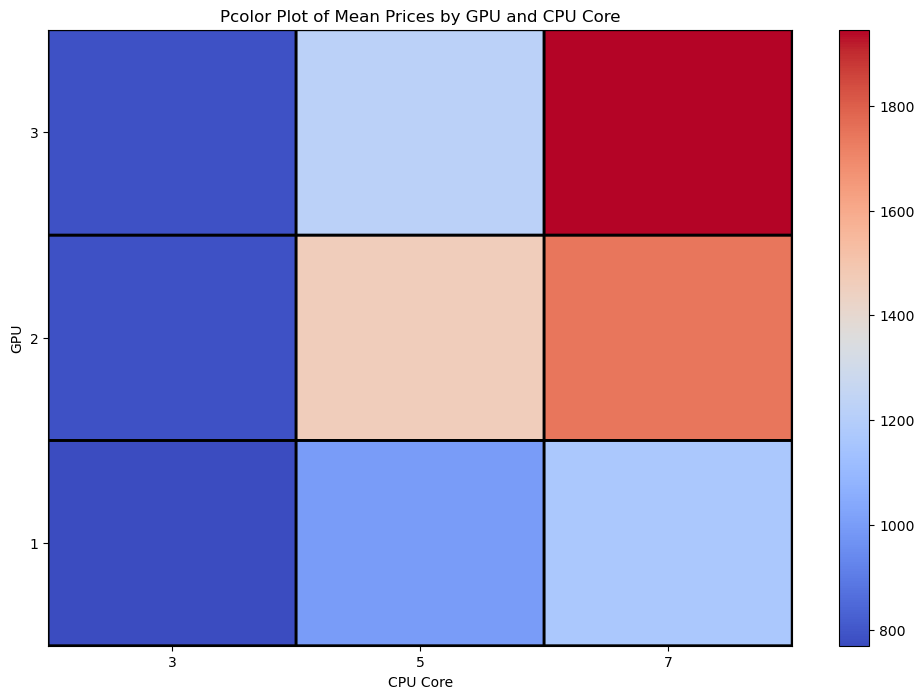

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'J:\Headlines\ciencia de datos\else\IA Generativa\mejore su carrera en el análisis de datos\WEEK 2/laptop_pricing_dataset_mod2.csv'
df = pd.read_csv(file_path)

# Step 1: Group the attributes "GPU", "CPU_core" and "Price"
# This step is implicit in the pivot table creation

# Step 2: Create a pivot table for this group
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc=np.mean)

# Step 3: Plot a pcolor plot for this pivot table
plt.figure(figsize=(12, 8))
plt.pcolor(pivot_table, cmap='coolwarm', edgecolors='k', linewidths=2)
plt.colorbar()

# Formatting the plot
plt.title('Pcolor Plot of Mean Prices by GPU and CPU Core')
plt.xlabel('CPU Core')
plt.ylabel('GPU')

# Adding the tick labels
plt.xticks(np.arange(0.5, len(pivot_table.columns), 1), pivot_table.columns)
plt.yticks(np.arange(0.5, len(pivot_table.index), 1), pivot_table.index)

plt.show()